# DATA IMPORT AND CONCATENATION

In [29]:
from google.colab import drive

#Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np

In [31]:
#Raw datasets Fransisca Eva TP058983
df = pd.read_csv("/content/gdrive/My Drive/ODL ASSIGNMENT TESLA/TSLA.csv")
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2889,2021-12-17,914.770020,960.659973,909.039978,932.570007,932.570007,33479100
2890,2021-12-20,910.700012,921.690002,893.390015,899.940002,899.940002,18826700
2891,2021-12-21,916.869995,939.500000,886.119995,938.530029,938.530029,23839300
2892,2021-12-22,965.659973,1015.659973,957.049988,1008.869995,1008.869995,31211400
2893,2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400
2894,2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
2895,2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000
2896,2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000
2897,2021-12-30,1061.329956,1095.550049,1053.150024,1070.339966,1070.339966,15680300
2898,2021-12-31,1073.439941,1082.000000,1054.589966,1056.780029,1056.780029,13577900


# DATA PRE-PROCESSING

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2899 non-null   object 
 1   Open       2899 non-null   float64
 2   High       2899 non-null   float64
 3   Low        2899 non-null   float64
 4   Close      2899 non-null   float64
 5   Adj Close  2899 non-null   float64
 6   Volume     2899 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 158.7+ KB


In [33]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2.899000e+03
mean,123.262719,125.882152,120.492565,123.360381,123.360381,3.139106e+07
std,226.272890,231.207664,220.999259,226.491649,226.491649,2.823222e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,17.118000,18.094999,16.420001,17.483000,17.483000,1.284450e+07
50%,46.144001,46.956001,45.422001,46.122002,46.122002,2.482750e+07
75%,66.691002,67.971001,65.465000,66.784000,66.784000,3.999685e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [34]:
df.shape

(2899, 7)

In [35]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.nunique()

Date         2899
Open         2610
High         2606
Low          2616
Close        2707
Adj Close    2707
Volume       2869
dtype: int64

## Data Transformation

In [38]:
#convert date datatype
df['Date'] = pd.to_datetime(df['Date'])

print(f'This dataset contains stocks from {df.Date.min()} to {df.Date.max()}')

This dataset contains stocks from 2010-06-29 00:00:00 to 2021-12-31 00:00:00


## Data Visualization

<Axes: >

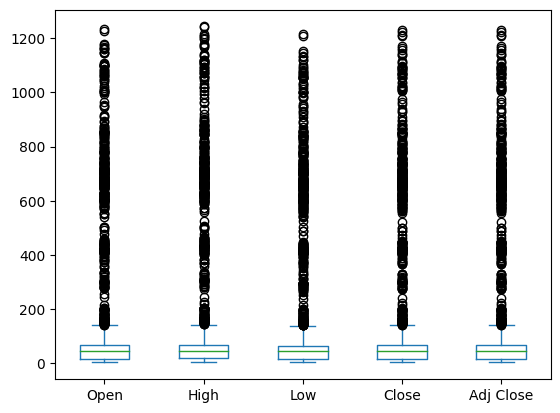

In [39]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [40]:
import plotly.graph_objects as go
import pandas as pd

# Create the Plotly figure
fig = go.Figure()

# Add the "Open and close" line trace
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='Open', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Close', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
title='Stock High and Low Prices of Tesla', xaxis_title='Date', yaxis_title='Price',hovermode='x', showlegend=True)
fig.show()


In [41]:
import plotly.graph_objects as go
import pandas as pd

# Create the Plotly figure
fig = go.Figure()

# Add the "Open and close" line trace
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
title='Stock Open and Close Prices of Tesla', xaxis_title='Date', yaxis_title='Price',hovermode='x', showlegend=True)
fig.show()


# Model Building

### Data Selection and Slicing

In [42]:
# "High" has been taken as the target variable
training_set = df.iloc[:, 2:3].values

In [43]:
print(training_set)

[[   5.      ]
 [   6.084   ]
 [   5.184   ]
 ...
 [1104.      ]
 [1095.550049]
 [1082.      ]]


In [44]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

df['Date'] = df['Date'].astype(int)
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [45]:
print(training_set_scaled)

[[0.00134982]
 [0.0022239 ]
 [0.00149819]
 ...
 [0.88752295]
 [0.88070937]
 [0.86978336]]


In [46]:
# Creating a data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
print(X_train)
X_train.shape

[[1.34982149e-03 2.22389944e-03 1.49818896e-03 ... 7.61189655e-04
  7.93443454e-04 6.96682057e-04]
 [2.22389944e-03 1.49818896e-03 1.04341040e-03 ... 7.93443454e-04
  6.96682057e-04 5.66054172e-04]
 [1.49818896e-03 1.04341040e-03 5.43476512e-04 ... 6.96682057e-04
  5.66054172e-04 5.74117621e-04]
 ...
 [6.48014277e-01 6.40225006e-01 6.31637412e-01 ... 8.62510110e-01
  8.98005432e-01 8.99618122e-01]
 [6.40225006e-01 6.31637412e-01 6.46425801e-01 ... 8.98005432e-01
  8.99618122e-01 8.87522948e-01]
 [6.31637412e-01 6.46425801e-01 6.39475111e-01 ... 8.99618122e-01
  8.87522948e-01 8.80709372e-01]]


(2839, 60)

In [48]:
print(y_train)
y_train.shape

[5.66054172e-04 5.74117621e-04 6.74104398e-04 ... 8.87522948e-01
 8.80709372e-01 8.69783358e-01]


(2839,)

In [49]:
# Reshaping to ensure that the input match the neural network architecture
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[1.34982149e-03]
  [2.22389944e-03]
  [1.49818896e-03]
  ...
  [7.61189655e-04]
  [7.93443454e-04]
  [6.96682057e-04]]

 [[2.22389944e-03]
  [1.49818896e-03]
  [1.04341040e-03]
  ...
  [7.93443454e-04]
  [6.96682057e-04]
  [5.66054172e-04]]

 [[1.49818896e-03]
  [1.04341040e-03]
  [5.43476512e-04]
  ...
  [6.96682057e-04]
  [5.66054172e-04]
  [5.74117621e-04]]

 ...

 [[6.48014277e-01]
  [6.40225006e-01]
  [6.31637412e-01]
  ...
  [8.62510110e-01]
  [8.98005432e-01]
  [8.99618122e-01]]

 [[6.40225006e-01]
  [6.31637412e-01]
  [6.46425801e-01]
  ...
  [8.98005432e-01]
  [8.99618122e-01]
  [8.87522948e-01]]

 [[6.31637412e-01]
  [6.46425801e-01]
  [6.39475111e-01]
  ...
  [8.99618122e-01]
  [8.87522948e-01]
  [8.80709372e-01]]]


## RNN model building

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [51]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [52]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [53]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [54]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

In [55]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
89/89 [==============================] - 19s 148ms/step - loss: 0.0032
Epoch 2/200
89/89 [==============================] - 13s 145ms/step - loss: 0.0011
Epoch 3/200
89/89 [==============================] - 13s 146ms/step - loss: 9.6020e-04
Epoch 4/200
89/89 [==============================] - 15s 168ms/step - loss: 0.0013
Epoch 5/200
89/89 [==============================] - 14s 155ms/step - loss: 9.3321e-04
Epoch 6/200
89/89 [==============================] - 13s 147ms/step - loss: 8.2822e-04
Epoch 7/200
89/89 [==============================] - 13s 149ms/step - loss: 8.6072e-04
Epoch 8/200
89/89 [==============================] - 13s 146ms/step - loss: 8.9539e-04
Epoch 9/200
89/89 [==============================] - 13s 147ms/step - loss: 0.0011
Epoch 10/200
89/89 [==============================] - 13s 146ms/step - loss: 8.7817e-04
Epoch 11/200
89/89 [==============================] - 13s 145ms/step - loss: 8.0787e-04
Epoch 12/200
89/89 [==============================] - 13s

# Making Prediction

In [56]:
df_test = pd.read_csv("/content/gdrive/My Drive/ODL ASSIGNMENT TESLA/TSLA TEST.csv")
real_stock_price = df_test.iloc[:, 2:3].values
df_test.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
47,2022-03-11,840.200012,843.799988,793.770020,795.349976,795.349976,22272800
48,2022-03-14,780.609985,800.700012,756.039978,766.369995,766.369995,23717400
49,2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400
50,2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600
51,2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300
52,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
53,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
54,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
55,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
56,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [57]:
print(real_stock_price)

[[1201.069946]
 [1208.      ]
 [1170.339966]
 [1088.      ]
 [1080.930054]
 [1059.099976]
 [1075.849976]
 [1114.839966]
 [1115.599976]
 [1052.      ]
 [1070.790039]
 [1054.670044]
 [1041.660034]
 [1004.549988]
 [ 933.51001 ]
 [ 951.26001 ]
 [ 987.690002]
 [ 935.390015]
 [ 857.5     ]
 [ 937.98999 ]
 [ 943.700012]
 [ 931.5     ]
 [ 937.      ]
 [ 936.5     ]
 [ 947.77002 ]
 [ 926.289978]
 [ 946.27002 ]
 [ 943.809998]
 [ 915.960022]
 [ 898.880005]
 [ 923.      ]
 [ 926.429993]
 [ 918.5     ]
 [ 886.869995]
 [ 856.72998 ]
 [ 835.299988]
 [ 802.47998 ]
 [ 819.5     ]
 [ 876.859985]
 [ 889.880005]
 [ 886.47998 ]
 [ 886.440002]
 [ 855.650024]
 [ 866.140015]
 [ 849.98999 ]
 [ 860.559998]
 [ 854.450012]
 [ 843.799988]
 [ 800.700012]
 [ 805.570007]
 [ 842.      ]
 [ 875.      ]
 [ 907.849976]
 [ 942.849976]
 [ 997.859985]
 [1040.699951]
 [1024.48999 ]]


In [58]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df['High'], df_test['High']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 117):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


2/2 [==============================] - 2s 33ms/step


In [59]:
print(real_stock_price)

[[1201.069946]
 [1208.      ]
 [1170.339966]
 [1088.      ]
 [1080.930054]
 [1059.099976]
 [1075.849976]
 [1114.839966]
 [1115.599976]
 [1052.      ]
 [1070.790039]
 [1054.670044]
 [1041.660034]
 [1004.549988]
 [ 933.51001 ]
 [ 951.26001 ]
 [ 987.690002]
 [ 935.390015]
 [ 857.5     ]
 [ 937.98999 ]
 [ 943.700012]
 [ 931.5     ]
 [ 937.      ]
 [ 936.5     ]
 [ 947.77002 ]
 [ 926.289978]
 [ 946.27002 ]
 [ 943.809998]
 [ 915.960022]
 [ 898.880005]
 [ 923.      ]
 [ 926.429993]
 [ 918.5     ]
 [ 886.869995]
 [ 856.72998 ]
 [ 835.299988]
 [ 802.47998 ]
 [ 819.5     ]
 [ 876.859985]
 [ 889.880005]
 [ 886.47998 ]
 [ 886.440002]
 [ 855.650024]
 [ 866.140015]
 [ 849.98999 ]
 [ 860.559998]
 [ 854.450012]
 [ 843.799988]
 [ 800.700012]
 [ 805.570007]
 [ 842.      ]
 [ 875.      ]
 [ 907.849976]
 [ 942.849976]
 [ 997.859985]
 [1040.699951]
 [1024.48999 ]]


In [60]:
print(predicted_stock_price)

[[1047.7792 ]
 [1115.4984 ]
 [1133.0978 ]
 [1091.319  ]
 [1065.301  ]
 [1045.3162 ]
 [1031.6862 ]
 [1021.7932 ]
 [1049.7946 ]
 [1048.9797 ]
 [1013.4296 ]
 [1024.9503 ]
 [1020.8207 ]
 [1001.78436]
 [ 980.6669 ]
 [ 930.58875]
 [ 928.2647 ]
 [ 947.7536 ]
 [ 907.8527 ]
 [ 853.78827]
 [ 900.1704 ]
 [ 905.9554 ]
 [ 892.8624 ]
 [ 901.4578 ]
 [ 904.0587 ]
 [ 912.54974]
 [ 897.8609 ]
 [ 910.8911 ]
 [ 909.91656]
 [ 888.0525 ]
 [ 873.3231 ]
 [ 886.8535 ]
 [ 887.4607 ]
 [ 880.35834]
 [ 858.59717]
 [ 834.77234]
 [ 813.97894]
 [ 784.12134]
 [ 786.168  ]
 [ 831.43207]
 [ 845.78326]
 [ 847.85376]
 [ 854.65625]
 [ 835.0952 ]
 [ 839.8228 ]
 [ 826.1158 ]
 [ 828.57715]
 [ 822.6146 ]
 [ 812.26086]
 [ 779.87646]
 [ 776.02893]
 [ 802.2995 ]
 [ 831.16064]
 [ 863.4617 ]
 [ 901.36084]
 [ 957.7345 ]
 [ 999.42645]]


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
print("Mean Absolute Error: ", mean_absolute_error(predicted_stock_price, real_stock_price))
mse = mean_squared_error(predicted_stock_price, real_stock_price)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))
r2 = r2_score(real_stock_price, predicted_stock_price)
print("R-squared (R2) Score:", r2)

Mean Absolute Error:  39.91760043585527
Mean Squared Error:  2541.0449095870367
Root Mean Squared Error:  50.408778100515754
R-squared (R2) Score: 0.7486986931579034


In [63]:
predicted_stock_price = predicted_stock_price.reshape(-1)
print(predicted_stock_price)
print()

real_stock_price = real_stock_price.reshape(-1)
print(real_stock_price)

[1047.7792  1115.4984  1133.0978  1091.319   1065.301   1045.3162
 1031.6862  1021.7932  1049.7946  1048.9797  1013.4296  1024.9503
 1020.8207  1001.78436  980.6669   930.58875  928.2647   947.7536
  907.8527   853.78827  900.1704   905.9554   892.8624   901.4578
  904.0587   912.54974  897.8609   910.8911   909.91656  888.0525
  873.3231   886.8535   887.4607   880.35834  858.59717  834.77234
  813.97894  784.12134  786.168    831.43207  845.78326  847.85376
  854.65625  835.0952   839.8228   826.1158   828.57715  822.6146
  812.26086  779.87646  776.02893  802.2995   831.16064  863.4617
  901.36084  957.7345   999.42645]

[1201.069946 1208.       1170.339966 1088.       1080.930054 1059.099976
 1075.849976 1114.839966 1115.599976 1052.       1070.790039 1054.670044
 1041.660034 1004.549988  933.51001   951.26001   987.690002  935.390015
  857.5       937.98999   943.700012  931.5       937.        936.5
  947.77002   926.289978  946.27002   943.809998  915.960022  898.880005
  923.  

In [64]:
import plotly.graph_objects as go
import pandas as pd

# Create the Plotly figure
fig = go.Figure()

# Add the "Open and close" line trace
fig.add_trace(go.Scatter(x=df['Date'], y=predicted_stock_price, mode='lines', name='Predicted Price', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=df['Date'], y=real_stock_price, mode='lines', name='Real Stock Price', line=dict(color='blue', width=1)))

# Update layout for interactivity
fig.update_layout(
title='Stock High and Low Prices of Tesla', xaxis_title='Date', yaxis_title='Price',hovermode='x', showlegend=True)
fig.show()
